
# Project: Investigate a Dataset - [TMDb-movies]

## Table of  
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, I will talk about the data set collected from the movie database, or TMDb. 
The columns, in order list, are:
->id: shows each movie's id in TMDb
->imdb_id: shows each movie's id in IMDb
->popularity: shows how popular was each movie
->budget: shows each movies budget
->revenue: shows each movies revenue
->orignal_title: shows the title of each movie
->cast: shows the group of actors and actresses in each movie
->homepage: shows the homepage, if exists, of each movie
->director: shows each movie's director
->tagline: shows the tagline for each movie
->keywords: shows the words that each movie is about
->overview: shows briefly what each movie is about
->runtime: shows each movie's length
->genres: shows the genre of each movie
->production_companies: shows companies responsible for the production of each movie
->release_date: shows when each movie was released
->vote_count: shows how many votes each movie received
->vote_average: average ranking of votes of each movie (0 worst and 10 best)
->release_year: shows the year each movie was released in
->budget_adj: shows the budget of each movie in terms of 2010 dollars
->revenue_adj: shows the revenue of each movie in terms of 2010 dollars







### Question(s) for Analysis
Which years had high revenues?
Which years had high vote_average?
Which years had high popularity?

In [28]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

In [29]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [30]:
#reading the dataset 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The above cell shows that there is one duplicate in the dataset

In [31]:
df.duplicated().sum()#checking for duplicates

1

In [32]:
df[df.duplicated()] #showing the duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [33]:
df.dropna(axis=0,how='any',inplace=True)#removing Nan along with the duplicates

In [34]:
df.duplicated().sum() #making sure duplicates are removed

0

In [35]:
#AS SHOWN ABOVE THE DUPLICATES HAVE BEEN REMOVED

In [36]:
df_n=df.drop(df[df.revenue==0],axis=1,inplace=False)

In [37]:
#getting rid of zero rebvenues
df_n=df[df.revenue>0]
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 10819
Data columns (total 21 columns):
id                      1446 non-null int64
imdb_id                 1446 non-null object
popularity              1446 non-null float64
budget                  1446 non-null int64
revenue                 1446 non-null int64
original_title          1446 non-null object
cast                    1446 non-null object
homepage                1446 non-null object
director                1446 non-null object
tagline                 1446 non-null object
keywords                1446 non-null object
overview                1446 non-null object
runtime                 1446 non-null int64
genres                  1446 non-null object
production_companies    1446 non-null object
release_date            1446 non-null object
vote_count              1446 non-null int64
vote_average            1446 non-null float64
release_year            1446 non-null int64
budget_adj              1446 non-null flo

I made a new dataframe (df_n) that does not have duplicates and revenues are not zero in it.

In [38]:
df_n.shape #showing rows and columns

(1446, 21)

In [39]:
df_n.describe() #mean, range, IQR, std, and count

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1446.000000,1446.000000,1.446000e+03,1.446000e+03,1446.000000,1446.000000,1446.000000,1446.000000,1.446000e+03,1.446000e+03
mean,56470.806362,1.654715,4.628527e+07,1.587198e+08,109.625864,857.894191,6.276349,2007.206777,4.862291e+07,1.794165e+08
std,78098.185097,2.090330,5.450919e+07,2.448540e+08,24.376553,1212.657056,0.811352,7.941620,5.485810e+07,2.859650e+08
min,11.000000,0.005391,0.000000e+00,1.000000e+01,40.000000,10.000000,2.100000,1961.000000,0.000000e+00,1.000000e+01
25%,7284.500000,0.581012,7.850000e+06,1.444875e+07,96.000000,133.000000,5.800000,2006.000000,8.616366e+06,1.665450e+07
50%,22822.500000,1.066889,2.800000e+07,6.665356e+07,106.000000,372.500000,6.300000,2009.000000,3.000000e+07,7.098536e+07
75%,68112.500000,1.946016,6.375000e+07,1.893947e+08,120.000000,1059.000000,6.800000,2012.000000,6.944981e+07,2.123399e+08
max,353326.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


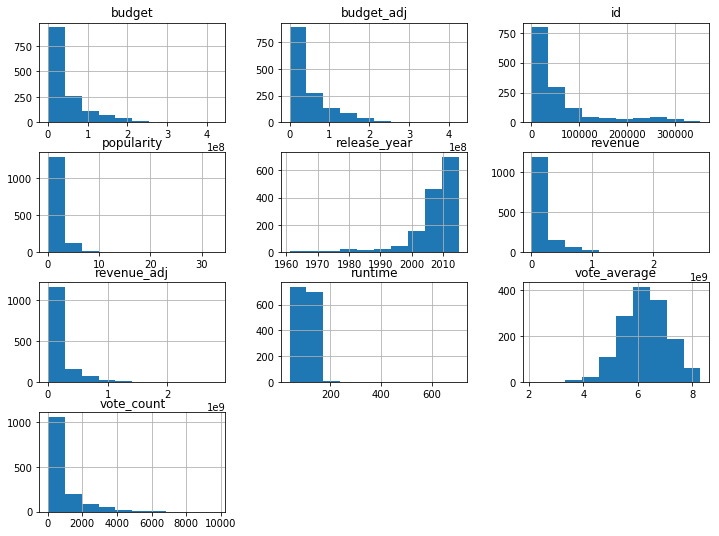

In [40]:
df_n.hist(figsize=(12,9)); #a histogram to show df_n

In [41]:
df_n.info()#checking for missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 10819
Data columns (total 21 columns):
id                      1446 non-null int64
imdb_id                 1446 non-null object
popularity              1446 non-null float64
budget                  1446 non-null int64
revenue                 1446 non-null int64
original_title          1446 non-null object
cast                    1446 non-null object
homepage                1446 non-null object
director                1446 non-null object
tagline                 1446 non-null object
keywords                1446 non-null object
overview                1446 non-null object
runtime                 1446 non-null int64
genres                  1446 non-null object
production_companies    1446 non-null object
release_date            1446 non-null object
vote_count              1446 non-null int64
vote_average            1446 non-null float64
release_year            1446 non-null int64
budget_adj              1446 non-null flo


### Data Cleaning

In [42]:
#dropping the columns that I will not use.
df_new=df_n.drop(['production_companies','budget_adj','revenue_adj','id','imdb_id','budget','original_title','cast','director','homepage','keywords','tagline','overview','runtime','release_date','vote_count'],axis=1,inplace=False)
df_new.head()

,popularity,revenue,genres,vote_average,release_year
0,32.985763,1513528810,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,378436354,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,295238201,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,2068178225,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,1506249360,Action|Crime|Thriller,7.3,2015


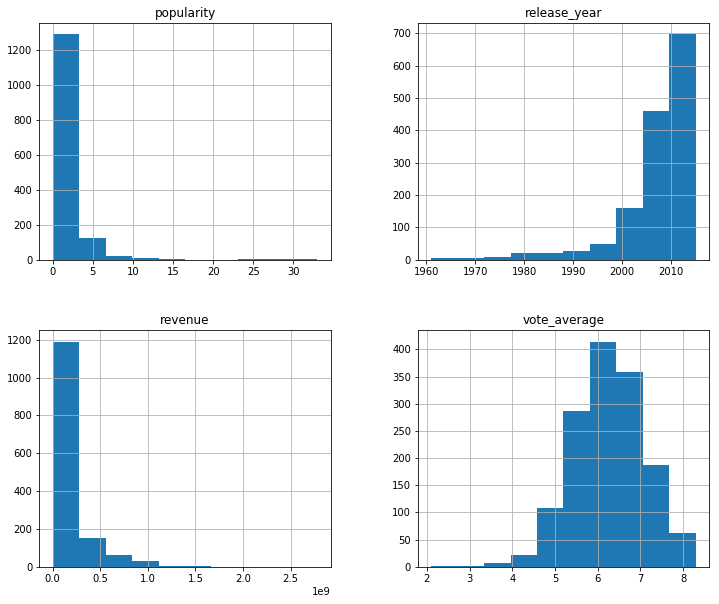

In [43]:
df_new.hist(figsize=(12,10)); #general histogram of df_new

In [44]:
df_new.dropna(axis=0,how='any',inplace=True)#dropping the Nan values for reassurance
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 10819
Data columns (total 5 columns):
popularity      1446 non-null float64
revenue         1446 non-null int64
genres          1446 non-null object
vote_average    1446 non-null float64
release_year    1446 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 67.8+ KB


In [45]:
df_new.describe() #showing the data that will be extracted from

,popularity,revenue,vote_average,release_year
count,1446.000000,1.446000e+03,1446.000000,1446.000000
mean,1.654715,1.587198e+08,6.276349,2007.206777
std,2.090330,2.448540e+08,0.811352,7.941620
min,0.005391,1.000000e+01,2.100000,1961.000000
25%,0.581012,1.444875e+07,5.800000,2006.000000
50%,1.066889,6.665356e+07,6.300000,2009.000000
75%,1.946016,1.893947e+08,6.800000,2012.000000
max,32.985763,2.781506e+09,8.300000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Which years had high vote_average?

I want to know how people's votes change over the years.
I will assign the vote_avg variable for the dataframe's vote_average column.

In [46]:
vote_avg=df_new.vote_average

I will assign a variable (high_vote_avg and low_vote_avg) that will tell if the vote_averages were high or low (higher or lower respectively than the mean of the vote_average column) and those variables are boolean.

In [47]:
# using mean as the threshold of high
high_vote_avg=vote_avg>=vote_avg.mean()
low_vote_avg=~high_vote_avg & vote_avg>0

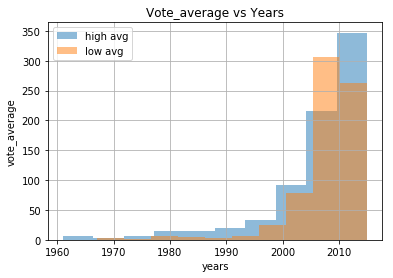

In [48]:
# using a histogram with labels and legend
df_new.release_year[high_vote_avg].hist(alpha=0.5,label='high avg')
df_new.release_year[low_vote_avg].hist(alpha=0.5,label='low avg')
plt.ylabel('vote_average')
plt.xlabel('years')
plt.title('Vote_average vs Years')
plt.legend();

As shown above, as years pass by the average vote of people becomes less.

### Which years had high revenues?

I want to know how the revenues of movies change over the years.
I will assign the rev variable for simplicity.
('Conclusion' part has the conclusion for all the question's results.)

In [49]:
rev=df_new.revenue

I will assign a variable (high_rev and low_rev) that will tell if the revenues were high or low (higher or lower respectively than the mean of the revenue column) and those variables are boolean.

In [50]:
# using mean as the threshold of high
high_rev=rev>=rev.mean()
low_rev=rev>0 & ~high_rev

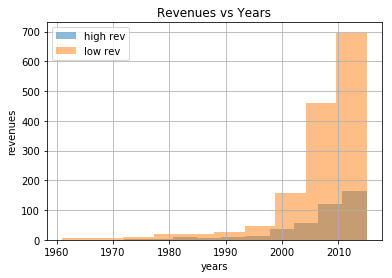

In [51]:
# using a histogram with labels and legend
df_new.release_year[high_rev].hist(alpha=0.5,label='high rev')
df_new.release_year[low_rev].hist(alpha=0.5,label='low rev')
plt.ylabel('revenues')
plt.xlabel('years')
plt.title('Revenues vs Years')
plt.legend();

AS shown above, movies with low revenues are higher than movies with high revenues.

### From year to year, how does the popularity of movies change?

I want to know how the popularity of movies change over the years.
I will assign the pop variable for the popularity of the dataset.

In [52]:
pop=df_new.popularity #pop is assigned for popularity

I will assign a variable (high_pop and low_pop) that will tell if the movie's popularity was high or low (higher or lower respectively than the mean of the popularity column) and those variables are boolean.

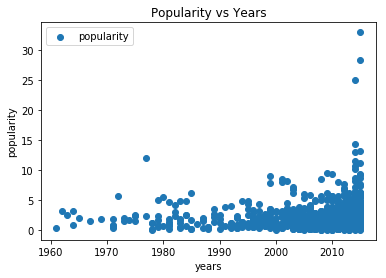

In [53]:
# using a scatter plot with labels and legend
ax=plt.figure().add_subplot(111)
ax.scatter(df_new.release_year,df_new.popularity)
plt.ylabel('popularity')
plt.xlabel('years')
plt.title('Popularity vs Years')
plt.legend();

AS shown above, as years go by movies gain higher popularity.

<a id='conclusions'></a>
## Conclusions

> For the first question, as years pass by the average vote of people becomes less.
> For the second question, movies with low revenues are higher than movies with revenues.
> For the third question, as years increase by movies gain higher popularity.
> For all the questions, popularity, revenues, and votes increase because population increases as years pass by.

### Limitations
> Some movies were missing data so I had to just ignore those.
> There are some outliers that I left behind.
> Population in the earlier years was less so the data acquired might not be accurate.



In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0